# FINAL EXAM

In [51]:
import sys
import os
import enum
from graphviz import Source
import graphviz
import networkx as nx 
print("Version of Python I am using is", sys.version)
print("Version of networkx I am using is", nx.__version__)

Version of Python I am using is 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Version of networkx I am using is 3.2.1


In [52]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

# Exam class
# WRITE CODE ONLY HERE

In [53]:
class WriteDot:
    def __init__(self, d: "bool", start: "int", a: "list of list", f: "filename") -> "None":
        print("In graph", f)
        print("ZERO Marks will be given if you don't write code here")

        with open(f, "w") as file:
            file.write(f"## Jagadeesh Vasudevamurthy ####\n")
            file.write("digraph g {\n")
            file.write("edge [dir=none, color=red]\n")

            for i in range(len(a)):
                for j in a[i]:
                    file.write(f"\t{i}->{j}\n")

            file.write(f"label= \"{str(a)}\"\n")
            file.write("}\n")

In [54]:

class Write2Dot:
    def __init__(self, d: "bool", start: "int", a: "list of list", ans: "list of list", f: "filename") -> "None":
        print("out graph", f)
        print("ZERO marks will be given if you don't write code here")

        written_clusters = set()  # To track clusters already written
        written_edges = set()     # To track edges already written

        with open(f, "w") as file:
            file.write(f"## Jagadeesh Vasudevamurthy ####\n")
            file.write("graph g {\n")
            file.write("\toverlap=false; splines=true\n")
            file.write("\tedge [style=dotted, weight=10, len=.2]\n")

            for i in range(len(ans)):
                cluster_name = "RED" if i % 2 == 0 else "BLUE"
                color = "red" if i % 2 == 0 else "blue"

                # Check if the cluster has already been written
                if cluster_name not in written_clusters:
                    file.write(f"\tsubgraph cluster_{cluster_name} {{\n")
                    file.write(f"\t\t{cluster_name} [pos=\"-1,0!\", color={color}]\n")
                    for node in ans[i]:
                        file.write(f"\t\t{node} -- {cluster_name}\n")
                    file.write("\t}\n")

                    # Mark the cluster as written
                    written_clusters.add(cluster_name)

            file.write("\tedge [style=\"\", weight=1, len=1]\n")

            for i in range(len(a)):
                for j in a[i]:
                    # Check if the edge has already been written
                    if (i, j) not in written_edges and (j, i) not in written_edges:
                        file.write(f"\t{i}--{j}\n")

                        # Mark the edge as written
                        written_edges.add((i, j))
                        written_edges.add((j, i))

            if ans:
                file.write(f"label= \"{str(ans[0])}{str(ans[1])}\"\n")
            file.write("}\n")


In [55]:
from collections import deque

class Exam:
    def __init__(
        self,
        num: "int",
        d: "bool",
        start: "int",
        a: "list of list",
        ans: "list of list",
        work: "list of size 1",
        show: "bool",
    ):
        self._num = num
        self._dir = d
        self._start = start
        self._a = a
        self._ans = ans
        self._work = work
        self._show = show

        ## Nothing can be changed below
        if self._show:
            # CHANGE THIS. MUST post all pdf in Canvas as a ZIP file
            # DO NOT UPLOAD DOT FILES
            outputDir = "C:\\Users\\jashm\\OneDrive\\Desktop\\PSA\\s\\"
            f = outputDir + str(self._num) + "in.dot"
            e = WriteDot(self._dir, self._start, self._a, f)
        self._alg()  # Everything happens in _alg
        if self._show:
            f = outputDir + str(self._num) + "out.dot"
            e = Write2Dot(self._dir, self._start, self._a, self._ans, f)

    ############################################################
    #  Write your code below
    ###########################################################
    def _alg(self) -> "None":
        n = len(self._a)
        col = [-1] * n
        partition = {0: set(), 1: set()}  # To store nodes in different partitions
        steps = 0  # Variable to count the steps

        for i in range(n):
            if col[i] != -1:
                continue

            q = deque()
            q.append((i, 0))
            partition[0].add(i)  # Add the first node to the first partition

            while q:
                node, color = q.popleft()

                if col[node] == -1:
                    col[node] = color
                    for nx in self._a[node]:
                        q.append((nx, color ^ 1))
                        partition[color ^ 1].add(nx)  # Add adjacent nodes to the opposite partition

                    steps += 1  # Increment the step count

                if col[node] != color:
                    print("**************************************************")
                    print("Answer",self._ans)
                    print("**************************************************")
                    return False

        print("**************************************************")
        # Store both partitions in the ans variable
        self._ans.append(list(partition[0]))
        self._ans.append(list(partition[1]))
        print("Answer", self._ans)
        # Store the number of steps in the work variable
        self._work[0] = steps
        print("Work", self._work[0])
        return True


# Exam test class
# NOTHING CAN BE CHANGED BELOW

In [56]:
############################################################
# ExamTest.py 
# Test Bench for Exam
# 
###########################################################

############################################################
#  NOTHING CAN BE CHANGED IN THIS FILE
########################################################### 

############################################################
#  All imports here
###########################################################
import sys # For getting Python Version
#from Exam import *

############################################################
#  class  ExamTest
###########################################################
class ExamTest:
    def __init__(self):
        self._n = 0
        self._simple()
        self._hidden()

    def _test1(self, directed: "bool", start: "int", a: "list of list", eans: "bool"):
        ans = []  # list of list
        work = [0]
        show = True
        self._n += 1
        print("----------PROBLEM", self._n, "----------------------")
        e = Exam(self._n, directed, start, a, ans, work, show)
        
    def _simple(self):
        directed = False
        start = 0
        eans = True
        a = [[1, 3], [0, 2], [1, 3], [0, 2]]  # list of list
        b=[[1,2,3],[0,2],[0,1,3],[0,2]]
        self._test1(directed, start, a, eans)

    def _hidden(self):
        print("I will run hidden tests after you submit and make you suffer")
        print("You may get much less than 80. So go to PLAN B")
       


 ############################################################
# MAIN
###########################################################    
def main():
    print("Input is Undirected graph with NO Self loop or  NO parallel edges")
    print(
        "The graph may not be connected, meaning there may be two nodes u and v such that there is no path between them"
    )
    t = ExamTest()
    print("MY NAME AS SHOWN ON CANVAS iS : JASH MEHTA")
    print("Time  complexity OF MY CODE is : O(V+E)")
    print("Space complexity OF MY CODE is : O(V)")
    print("NOTE REAL TEST BENCH WILL BE POSTED AFTER EXAM.")
    print("RUN ON YOUR OWN TO SEE WHERE YOU STAND.")
    print("EXAM ENDS. Cannot post more than once in Canvas")

############################################################
# start up
###########################################################
if (__name__  == '__main__'):
    main()


Input is Undirected graph with NO Self loop or  NO parallel edges
The graph may not be connected, meaning there may be two nodes u and v such that there is no path between them
----------PROBLEM 1 ----------------------
In graph C:\Users\jashm\OneDrive\Desktop\PSA\s\1in.dot
ZERO Marks will be given if you don't write code here
**************************************************
Answer [[0, 2], [1, 3]]
Work 4
out graph C:\Users\jashm\OneDrive\Desktop\PSA\s\1out.dot
ZERO marks will be given if you don't write code here
I will run hidden tests after you submit and make you suffer
You may get much less than 80. So go to PLAN B
MY NAME AS SHOWN ON CANVAS iS : JASH MEHTA
Time  complexity OF MY CODE is : O(V+E)
Space complexity OF MY CODE is : O(V)
NOTE REAL TEST BENCH WILL BE POSTED AFTER EXAM.
RUN ON YOUR OWN TO SEE WHERE YOU STAND.
EXAM ENDS. Cannot post more than once in Canvas


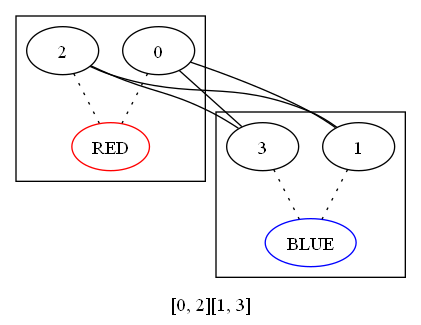

In [57]:
from graphviz import Source
from IPython.display import Image, display

def generate_and_display_dot_file(dot_filename):
    # Load the original DOT source from the file
    with open(dot_filename, "r") as source_file:
        dot_source = source_file.read()

    # Create a Source object from the DOT source
    graph = Source(dot_source, format="png")

    # Save the modified DOT source to a new file
    dot_filename_output = dot_filename.split(".")[0] + "_output.dot"
    with open(dot_filename_output, "w") as output_file:
        output_file.write(dot_source)

    # Display the graph in the Jupyter Notebook
    display(Image(graph.render(filename=dot_filename_output, format="png", cleanup=True)))

# Usage example
generate_and_display_dot_file("C:\\Users\\jashm\\OneDrive\\Desktop\\PSA\\s\\1out.dot")

